In [3]:
%pylab inline

from typing import List
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
from datetime import datetime
import math

Populating the interactive namespace from numpy and matplotlib


# Data
**Start:** 04.1969  
**End:** 08.2022  
**Interval:** Monthly  
Data: stooq.com

In [4]:
csv = pd.read_csv('data/spx_m.csv')
df = csv
df

,Date,Open,High,Low,Close,Volume
0,1969-06-30,103.46,103.75,95.21,97.71,1.306278e+08
1,1969-07-31,97.71,100.33,88.04,91.83,1.268056e+08
2,1969-08-31,91.92,96.43,91.48,95.51,1.120444e+08
3,1969-09-30,95.51,96.62,91.77,93.12,1.217500e+08
4,1969-10-31,93.12,98.83,91.66,97.12,1.722833e+08
...,...,...,...,...,...,...
634,2022-04-30,4540.32,4593.45,4124.28,4131.93,4.920787e+10
635,2022-05-31,4130.61,4307.66,3810.32,4132.15,5.529092e+10
636,2022-06-30,4149.78,4177.51,3636.87,3785.38,5.294019e+10
637,2022-07-31,3781.00,4140.15,3721.56,4130.29,4.491820e+10


In [5]:
len(csv)

639

In [25]:
# common/lib.py:least_squares(X: List[Union[int,float]], Y: List[Union[int, float]]) -> Tuple[list, float, float]
from common import least_squares

In [27]:
Y = df['Close']
X = range(df.shape[0])
slope, _, _ = least_squares(X, Y)

In [28]:
low = min(df['Close'])
high = max(df['Close'])

In [29]:
fixed_ticks = [low]
next_round = math.ceil(low/100)*100
prelast_round = math.floor(high/100)*100
fixed_ticks += range(next_round, prelast_round+100, 500)
fixed_ticks.append(high)
fixed_ticks

[63.54, 100, 600, 1100, 1600, 2100, 2600, 3100, 3600, 4100, 4600, 4766.18]

In [30]:
DATES_INTERVAL = df.shape[0]//10

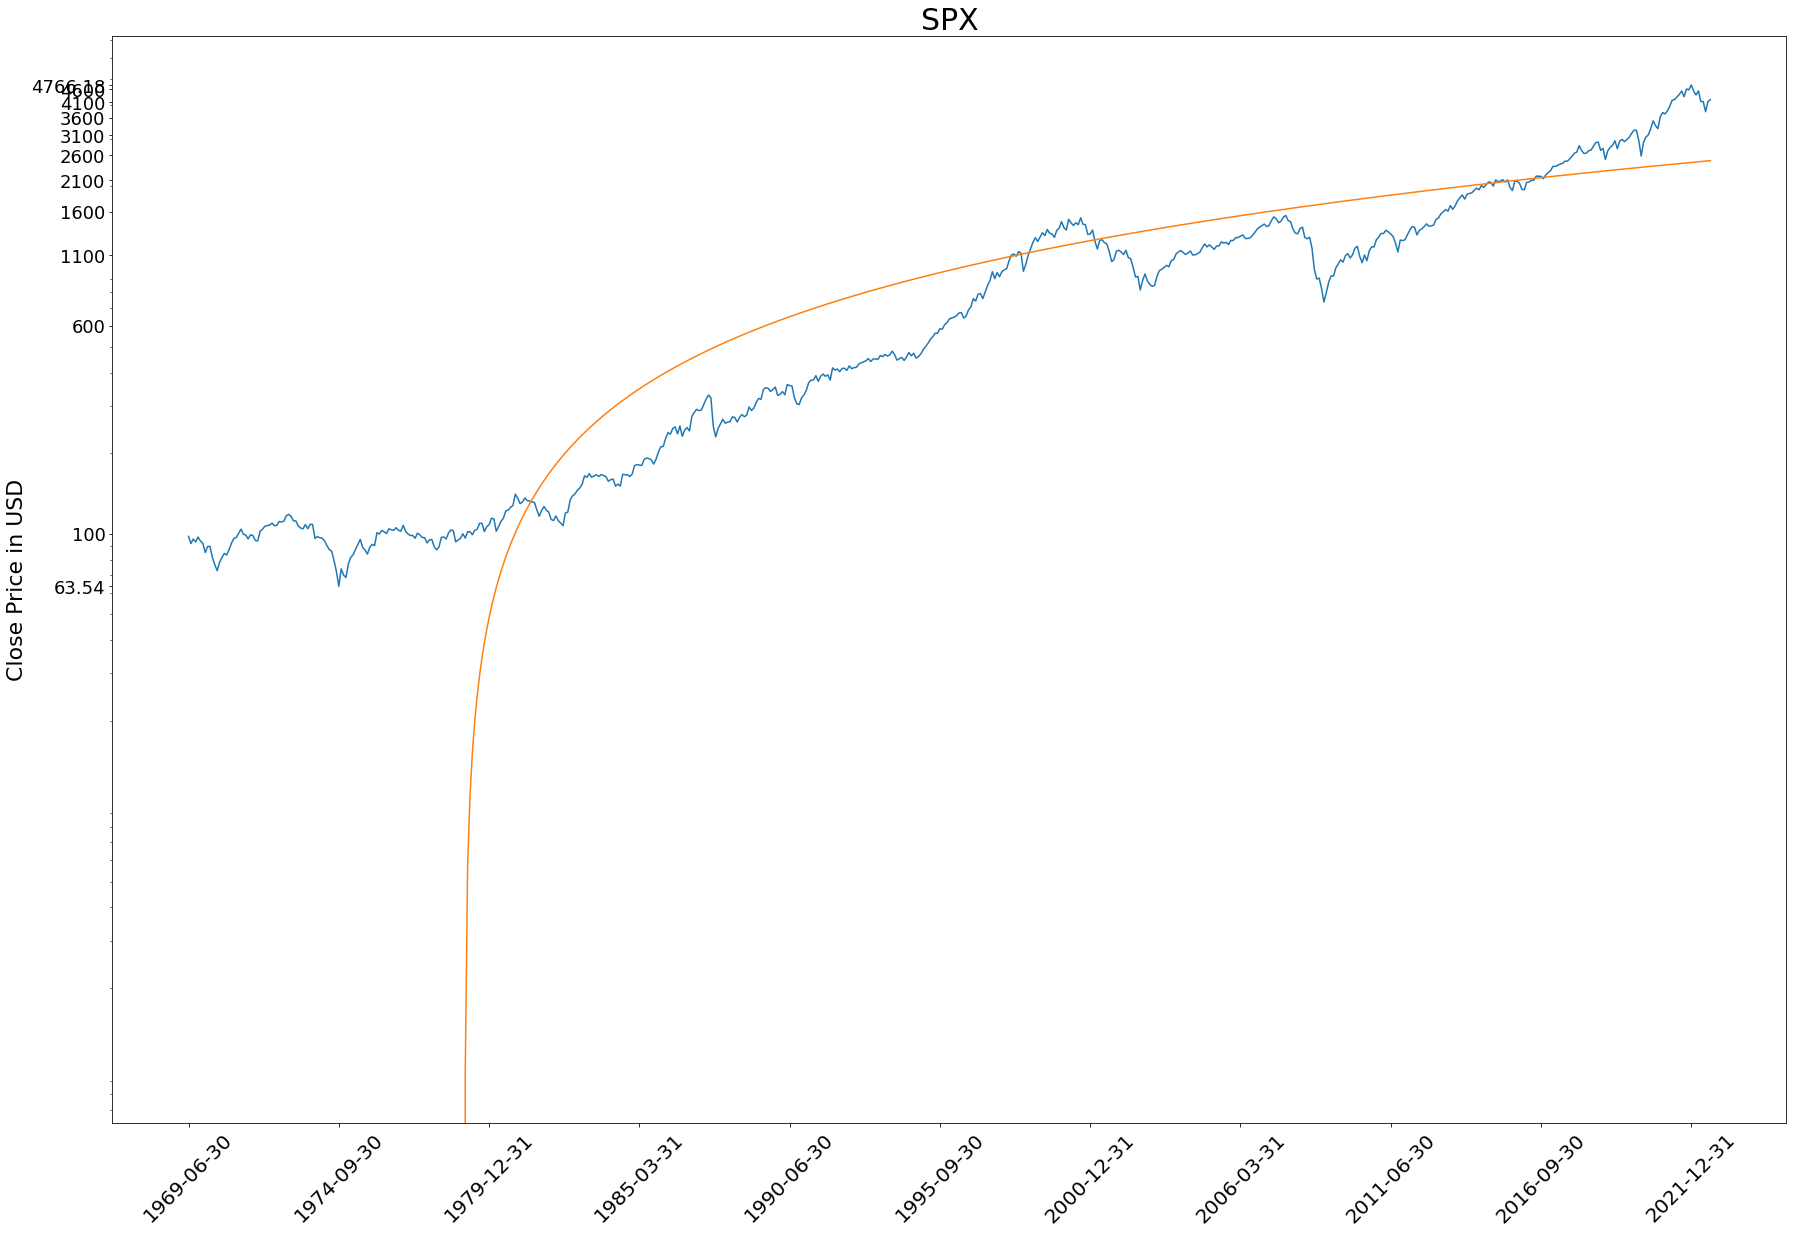

In [33]:
fig, ax = plt.subplots(figsize=(30,20))
plt.plot(range(df.shape[0]), df['Close'], range(df.shape[0]), slope)

plt.yscale('log')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))
ax.yaxis.set_major_locator(ticker.FixedLocator(fixed_ticks))


plt.xticks(range(0, df.shape[0], DATES_INTERVAL), df['Date'].loc[::DATES_INTERVAL], rotation=45, fontsize=20)
plt.yticks(fontsize=18)

plt.title('SPX', fontsize=30)
plt.ylabel('Close Price in USD', fontsize=22)
plt.show()

In [22]:
Y = df['Close']
X = range(df.shape[0])
slope, _, _ = least_squares(x, Y)n

In [23]:
slope

[-550.5982842331756,
 -545.8434806675289,
 -541.0886771018821,
 -536.3338735362354,
 -531.5790699705886,
 -526.8242664049419,
 -522.069462839295,
 -517.3146592736483,
 -512.5598557080016,
 -507.80505214235484,
 -503.0502485767081,
 -498.29544501106136,
 -493.5406414454146,
 -488.7858378797678,
 -484.0310343141211,
 -479.27623074847435,
 -474.5214271828276,
 -469.7666236171808,
 -465.0118200515341,
 -460.25701648588733,
 -455.5022129202406,
 -450.74740935459386,
 -445.9926057889471,
 -441.2378022233003,
 -436.4829986576536,
 -431.72819509200684,
 -426.9733915263601,
 -422.2185879607133,
 -417.46378439506657,
 -412.70898082941983,
 -407.9541772637731,
 -403.19937369812635,
 -398.4445701324796,
 -393.6897665668329,
 -388.9349630011861,
 -384.18015943553934,
 -379.42535586989254,
 -374.6705523042458,
 -369.91574873859906,
 -365.1609451729523,
 -360.4061416073056,
 -355.65133804165885,
 -350.8965344760121,
 -346.14173091036537,
 -341.3869273447186,
 -336.63212377907183,
 -331.87732021342504